# Assignment2 - Supervised Learning flow

# Part 1(a) Student details:
* Please write the First-Name, First letter of Last-Name and last 4 digits of the i.d. for each student. 

In [2]:
#                       student details 1: Ofir F. 0607
# (if exists)           student details 2: Daniel S. 3117
# (if exists)           student details 3: Eliya Z. 4847
# (if exists&premitted) student details 4: Dana R. 6615

## Part 1(b) - Chat-GPT/other AI-agent/other assistance used:
* If you changed the prompt until you got a satisfying answer, please add all versions
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add information:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>   
AI agent name: Co - Pilot

Goal: To assist in fixing small syntax errors, identifying mistakes in code, and suggesting quick corrections during implementation.

AI agent name 2:ChatGPT

Goal: To gain a better understanding of the course material, clarify complex concepts, and receive code guidance.

Propmpt1: How do I perform feature engineering for a classification problem?
    
Propmpt2: What are the differences between SVM and KNN classifiers, and when is it better to use each one?
    
Propmpt3: What is the F1 score and when should it be used?

Propmpt4: How does GridSearchCV with cross-validation work?
   
</pre>

## Part 1(c) - Learning Problem and dataset explaination.
* Please explain in one paragraph
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add explaining text:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>

The “Wine Recognition” dataset is based on a chemical analysis of wines from a single region in Italy,
produced by three different cultivators.
It contains 178 samples, each described by 13 numerical features (such as alcohol, malic acid, magnesium, color intensity,
proline, and more) and labeled as one of three classes (class_0, class_1, class_2).
There are no missing values, and the classes are well separable—methods like RDA have achieved 100% accuracy on this dataset.
It has been used to compare the performance of various classifiers. The data originate from the UCI repository.

    
</pre>

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, make_scorer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay

In [4]:
#Load the dataset

In [5]:
def load_dataset(file_train , file_test):
    df_train = pd.read_csv(file_train)
    df_test = pd.read_csv(file_test)
    return df_train,df_test

In [8]:
file_train = "wine_train.csv"
file_test = "wine_test.csv"
df_train,df_test = load_dataset(file_train , file_test)

In [9]:
#Print the first 5 rows of the training dataset

In [10]:
df_train.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,12.08,1.83,2.32,18.5,81.0,1.60,1.50,0.52,1.64,2.40,1.08,2.27,480.0,1
1,13.58,2.58,2.69,24.5,105.0,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750.0,2
2,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0,1
3,11.82,1.72,1.88,19.5,86.0,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415.0,1
4,13.16,3.57,2.15,21.0,102.0,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830.0,2


In [11]:
df_test.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,13.78,2.76,2.30,22.0,90.0,1.35,0.68,0.41,1.03,9.58,0.70,1.68,615.0,2
1,14.02,1.68,2.21,16.0,96.0,2.65,2.33,0.26,1.98,4.70,1.04,3.59,1035.0,0
2,13.17,5.19,2.32,22.0,93.0,1.74,0.63,0.61,1.55,7.90,0.60,1.48,725.0,2
3,11.03,1.51,2.20,21.5,85.0,2.46,2.17,0.52,2.01,1.90,1.71,2.87,407.0,1
4,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2


In [12]:
#EDA

In [13]:
df_train.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,12.997254,2.297746,2.361690,19.419718,99.943662,2.315986,2.063592,0.346690,1.561901,5.030211,0.958563,2.638873,742.457746,0.922535
std,0.789931,1.093317,0.283231,3.354815,13.683751,0.639469,1.005302,0.117562,0.540979,2.239593,0.219631,0.718083,317.250905,0.772524
min,11.410000,0.740000,1.360000,10.600000,78.000000,0.980000,0.340000,0.130000,0.420000,1.280000,0.480000,1.290000,278.000000,0.000000
25%,12.370000,1.592500,2.222500,17.250000,88.000000,1.782500,1.257500,0.260000,1.250000,3.180000,0.800000,1.922500,500.000000,0.000000
50%,13.050000,1.865000,2.360000,19.250000,98.000000,2.380000,2.155000,0.320000,1.505000,4.800000,0.960000,2.815000,660.000000,1.000000
75%,13.637500,3.020000,2.557500,21.375000,108.000000,2.822500,2.887500,0.430000,1.870000,6.182500,1.120000,3.197500,957.500000,2.000000
max,14.750000,5.650000,3.230000,30.000000,151.000000,3.880000,5.080000,0.630000,3.580000,11.750000,1.450000,4.000000,1680.000000,2.000000


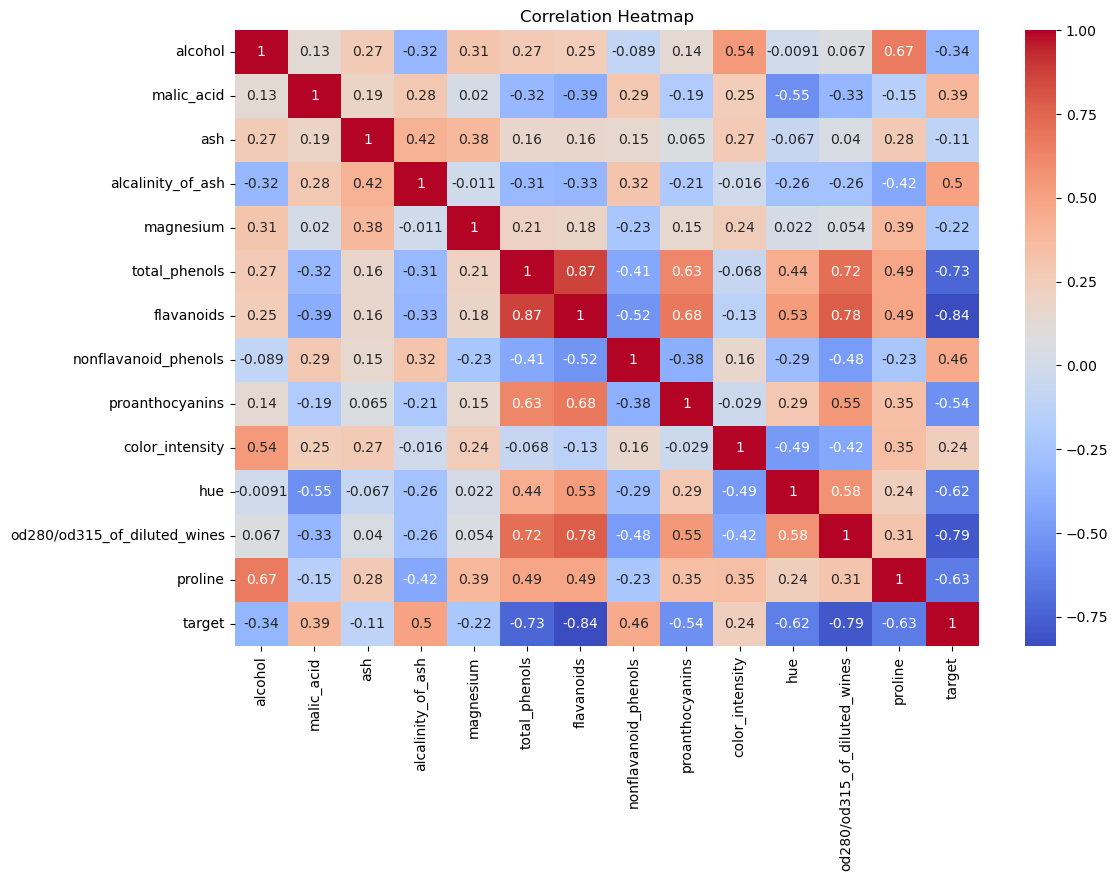

In [17]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_train.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

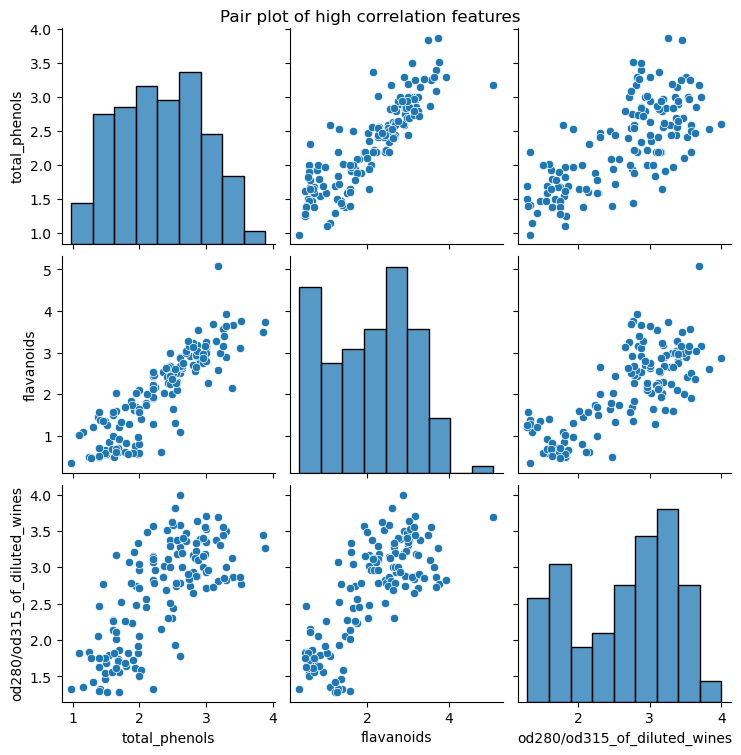

In [18]:
correlationFeatures = ['total_phenols','flavanoids', "od280/od315_of_diluted_wines"]
sns.pairplot(df_train[correlationFeatures])
plt.suptitle('Pair plot of high correlation features',y=1)
plt.show()

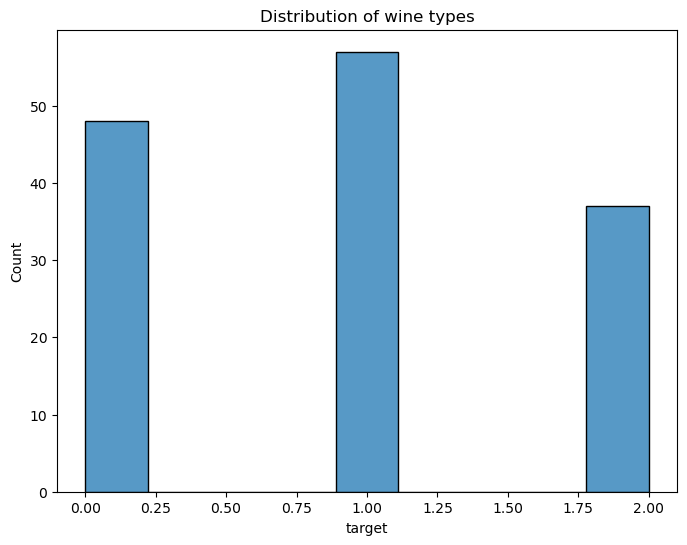

In [16]:
plt.figure(figsize=(8, 6))
sns.histplot(df_train['target'])
plt.title('Distribution of wine types')
plt.show()

## Part 3 - Experiments
You could add as many code cells as needed

In [148]:
#Cross validation

In [86]:
X_train = df_train.drop(columns=["target"])
y_train = df_train["target"]
X_test = df_test.drop(columns=["target"])
y_test = df_test["target"]

In [ ]:



preprocessing_options = [
    ('minmax', MinMaxScaler()),
    ('standard', StandardScaler())
]

#PCA options: None, 2, 5, 7 components,
pca_options = [
    ('pca_none', PCA(n_components=None)),
    ('pca_2', PCA(n_components=2)),
    ('pca_5', PCA(n_components=5)),
    ('pca_7', PCA(n_components=7))
]

#Algorithms: Decision Tree, KNN, Logistic Regression
models = [
    ('decision_tree', DecisionTreeClassifier()),
    ('knn', KNeighborsClassifier()),
    ('logistic_regression', LogisticRegression(max_iter=1000))
]
param_grid = {
    'decision_tree': {
        'model__max_depth': [3, 5, 10],
        'model__min_samples_split': [2, 5, 10],
        'model__min_samples_leaf': [1, 2, 4],
    },
    'knn': {
        'model__n_neighbors': [3, 5, 7],
        'model__weights': ['uniform', 'distance'],
        'model__metric': ['euclidean', 'manhattan', 'chebyshev']
    },
    'logistic_regression': {
        'model__C': [0.01, 0.1, 1, 10],
        'model__penalty': ['l2'],
        'model__solver': ['lbfgs', 'liblinear']
    }
}

In [127]:
#Convert to DataFrame,
results_df = pd.DataFrame(results)

#Expand best_params into columns,
best_params_df = results_df['best_params'].apply(pd.Series)

#Combine expanded params with the rest of the DataFrame,
results_df_expanded = pd.concat([results_df.drop(columns=['best_params']), best_params_df], axis=1)

#Sort by best_score and show top 5,
top_5 = results_df_expanded.sort_values(by='best_score', ascending=False).head(5)

top_5

,model,preprocessing,pca,best_score,model__max_depth,model__min_samples_leaf,model__min_samples_split,model__metric,model__n_neighbors,model__weights,model__C,model__penalty,model__solver
19,logistic_regression,minmax,pca_7,0.9790,NaN,NaN,NaN,NaN,NaN,NaN,0.1,l2,liblinear
9,knn,minmax,pca_2,0.9790,NaN,NaN,NaN,euclidean,5.0,uniform,NaN,NaN,NaN
10,knn,minmax,pca_5,0.9790,NaN,NaN,NaN,euclidean,7.0,uniform,NaN,NaN,NaN
16,logistic_regression,minmax,pca_none,0.9790,NaN,NaN,NaN,NaN,NaN,NaN,0.1,l2,liblinear
20,logistic_regression,standard,pca_none,0.9787,NaN,NaN,NaN,NaN,NaN,NaN,0.1,l2,lbfgs


In [111]:
#Show all results

all_combinations_df = pd.DataFrame(all_combinations)
all_combinations_df


,model,preprocessing,pca,params,score
0,decision_tree,minmax,pca_none,"{'model__max_depth': 3, 'model__min_samples_le...",0.9368
1,decision_tree,minmax,pca_none,"{'model__max_depth': 3, 'model__min_samples_le...",0.9295
2,decision_tree,minmax,pca_none,"{'model__max_depth': 3, 'model__min_samples_le...",0.9226
3,decision_tree,minmax,pca_none,"{'model__max_depth': 3, 'model__min_samples_le...",0.9434
4,decision_tree,minmax,pca_none,"{'model__max_depth': 3, 'model__min_samples_le...",0.9283
...,...,...,...,...,...
419,logistic_regression,standard,pca_7,"{'model__C': 0.1, 'model__penalty': 'l2', 'mod...",0.9717
420,logistic_regression,standard,pca_7,"{'model__C': 1, 'model__penalty': 'l2', 'model...",0.9644
421,logistic_regression,standard,pca_7,"{'model__C': 1, 'model__penalty': 'l2', 'model...",0.9644
422,logistic_regression,standard,pca_7,"{'model__C': 10, 'model__penalty': 'l2', 'mode...",0.9499


## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [149]:
#Get the preprocessing transformer and model object associated with the best model,
best_model = results_df.loc[results_df['best_score'].idxmax()]
best_preprocessing = dict(preprocessing_options)[best_model['preprocessing']]
best_pca = dict(pca_options)[best_model['pca']]
best_model_obj = dict(models)[best_model['model']]

best_pipe = Pipeline([
    ('preprocessing', best_preprocessing),
    ('pca',best_pca),
    ('model', best_model_obj)
])


In [150]:
#Set parameters of the best pipeline based on the best_params found during GridSearchCV

best_pipe.set_params(**best_model['best_params'])

Pipeline(steps=[('preprocessing', MinMaxScaler()), ('pca', PCA(n_components=2)),
                ('model', KNeighborsClassifier(metric='euclidean'))])

In [151]:
#Fit the best pipeline on the training data

best_pipe.fit(x_train, y_train)


Pipeline(steps=[('preprocessing', MinMaxScaler()), ('pca', PCA(n_components=2)),
                ('model', KNeighborsClassifier(metric='euclidean'))])

## Part 5 - Apply on test and show model performance estimation

In [152]:
#Predict on the test set using the entire pipeline
y_pred = best_pipe.predict(x_test)

In [153]:
#Check the predictions
print("Predictions on the test set:")
y_pred_df = pd.DataFrame({
    'Target': y_test,
   'Predicted': y_pred
})
y_pred_df.head()

Predictions on the test set:


,Target,Predicted
0,2,2
1,0,0
2,2,2
3,1,1
4,2,2


In [154]:
#Calculate F1-macro score on the test set using predictions from the best pipeline
f1 = f1_score(y_test, y_pred, average='macro')

print(f"F1-macro score of the best model on test set: {f1:.2f}")
print(f"Best Model: {best_model_obj}")
print(f"Best Preprocessing: {best_preprocessing}")
print(f"Best PCA: {best_pca}")

F1-macro score of the best model on test set: 0.97
Best Model: KNeighborsClassifier(metric='euclidean')
Best Preprocessing: MinMaxScaler()
Best PCA: PCA(n_components=2)


In [155]:
#Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

<Figure size 800x600 with 0 Axes>

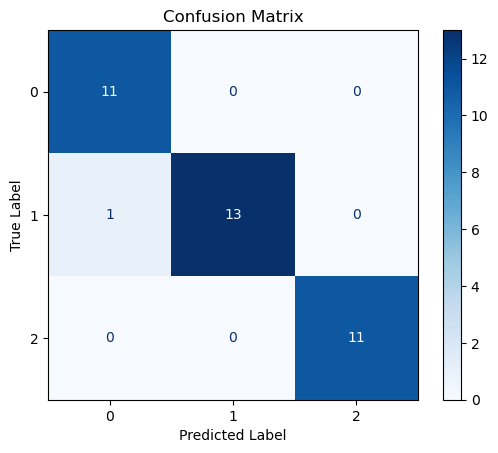

In [156]:

#Plot confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_pipe.named_steps['model'].classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
